In [1]:
import jax
import jax.numpy as jnp

from jax import config
config.update("jax_enable_x64", True)

import optax
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '..')
from prophet_utils.plot_utils import plot_iid_instance, plot_non_iid_instance

<h3>Semi Online IID Setting</h3>

In [2]:
from prophet_utils.iid_utils import competitive_ratio_semi_online, competitive_ratio_semi_online_normalized, normalize_box

competitive_ratio_semi_online_normalized_jit = jax.jit(competitive_ratio_semi_online_normalized, static_argnums=2)

In [3]:
# The example from the "Threshold Testing and Semi-Online Prophet Inequalities" paper.
N_paper = 1000
r_paper = jnp.asarray([0., 1., 2., 3.])
p_paper = jnp.asarray([1 - 3/N_paper, 1/N_paper, 1/N_paper, 1/N_paper])

print(competitive_ratio_semi_online(r_paper, p_paper, N_paper))

0.9799121626421241


In [4]:
N_iid = 100
r_iid_init = jnp.arange(N_iid)/N_iid # Initialize with a trivial starting distribution.
p_iid_init = jnp.ones(N_iid)/N_iid

r_iid = r_iid_init.copy()
p_iid = p_iid_init.copy()

In [5]:
optimizer_iid = optax.adam(learning_rate=1e-1)
opt_state_iid = optimizer_iid.init((r_iid, p_iid))

for i in range(1000):
    v_iid, grads = jax.value_and_grad(competitive_ratio_semi_online_normalized_jit, argnums=(0,1))(r_iid, p_iid, N_iid)
    updates_iid, opt_state_iid = optimizer_iid.update(grads, opt_state_iid)
    if i%100 == 0:
        print(v_iid)
    r_iid, p_iid = optax.apply_updates((r_iid, p_iid), updates_iid)

print(competitive_ratio_semi_online_normalized_jit(r_iid, p_iid, N_iid))

0.9986750385696551
0.9130699859090763
0.9124592802567134
0.9123264749016182
0.9122786722037426
0.9122190544990735
0.912197089610313
0.9121663593724164
0.9121505066822937
0.9121342947335356
0.912219709191653


<h3>Plotting the found distribution </h3>

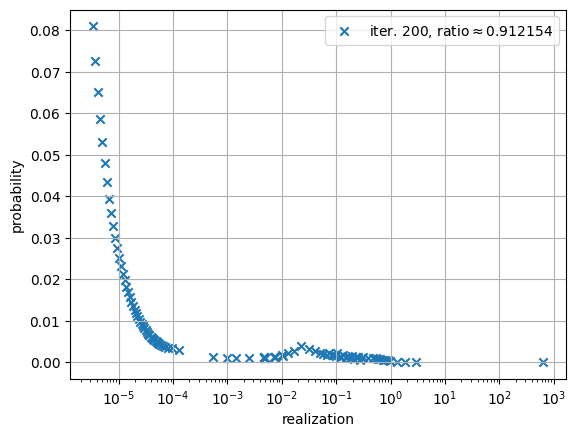

In [6]:
plot_iid_instance(*normalize_box(r_iid, p_iid), rf"iter. 200, ratio$\approx${v_iid:.6f}")
plt.grid()
plt.show()

<h3>Semi Online non IID Setting</h3>

In [7]:
from prophet_utils.non_iid_utils import competitive_ratio_semi_online_normalized as competitive_ratio_semi_online_normalized_non_idd
from prophet_utils.non_iid_utils import normalize_boxes

competitive_ratio_semi_online_normalized_non_idd_jit = jax.jit(competitive_ratio_semi_online_normalized_non_idd)

In [10]:
n = 40
m = 100

r_non_iid = jnp.tile(jnp.arange(m), (n, 1))/m
p_non_iid = jnp.ones((n, m))/m

In [9]:
optimizer_non_iid = optax.adam(learning_rate=1e-1)
opt_state_non_iid = optimizer_non_iid.init((r_non_iid, p_non_iid))

for i in range(1000):
    v_non_iid, grads = jax.value_and_grad(competitive_ratio_semi_online_normalized_non_idd_jit, argnums=(0,1))(r_non_iid, p_non_iid)
    updates_non_iid, opt_state_non_iid = optimizer_non_iid.update(grads, opt_state_non_iid)
    r_non_iid, p_non_iid = optax.apply_updates((r_non_iid, p_non_iid), updates_non_iid)
    if i%100 == 0:
        print(v_non_iid)

print(competitive_ratio_semi_online_normalized_non_idd_jit(r_non_iid, p_non_iid))

0.9957963197999122
0.8945759397954842
0.8860863425733545
0.883834785156159
0.8817572795841397
0.8788968447107157
0.8795476920857119
0.8759830276493744
0.8779055710784565
0.8748452570182603
0.8745114650754424
